<a href="https://colab.research.google.com/github/andreas31603/MechaineLearningTasks/blob/main/Task6/Task6_clusteringweek06_Clustering_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-learn yellowbrick

In [4]:
# Untuk mengabilkan dataset dari google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt

In [5]:
# Muat dataset dengan membatasi pada 5000 baris pertama
file_path = '/content/drive/MyDrive/Dataset/Online Retail.xlsx'
df_new = pd.read_excel(file_path, usecols=['CustomerID', 'Quantity', 'UnitPrice'], nrows=5000)

In [6]:
# Buang baris dengan nilai CustomerID yang hilang
df_new = df_new.dropna(subset=['CustomerID'])

In [7]:
# Agregasikan data berdasarkan CustomerID untuk membangun fitur clustering
df_customer = df_new.groupby('CustomerID').agg({
    'Quantity': 'sum',         # Total kuantitas yang dibeli
    'UnitPrice': 'mean'        # Rata-rata harga satuan
}).reset_index()

In [8]:
# Standarisasi fitur untuk memastikan semua berada pada skala yang sama
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_customer[['Quantity', 'UnitPrice']])

In [9]:
# Tentukan range cluster untuk KMeans dan hitung inertia untuk metode elbow
k_range = range(2, 11)
kmeans_inertia = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    kmeans_inertia.append(kmeans.inertia_)

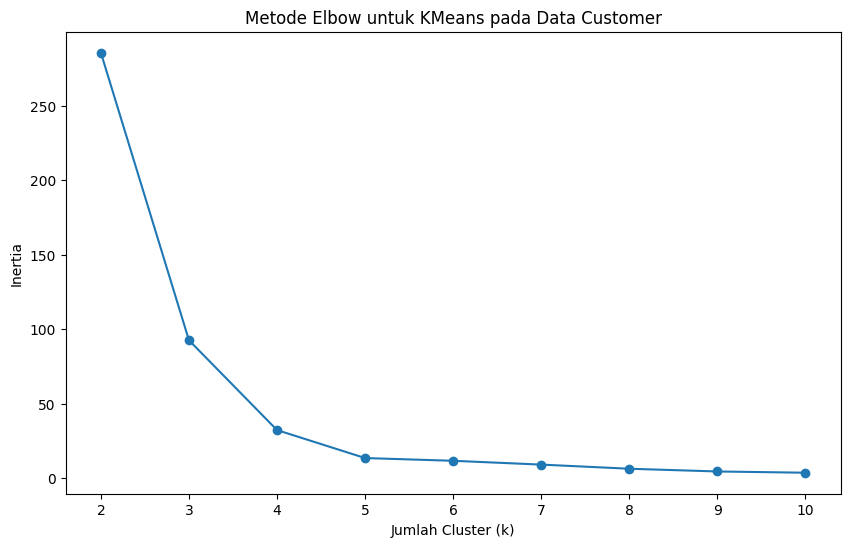

In [10]:
# Visualisasi metode elbow untuk menentukan jumlah cluster optimal pada KMeans
plt.figure(figsize=(10, 6))
plt.plot(k_range, kmeans_inertia, marker='o')
plt.xlabel("Jumlah Cluster (k)")
plt.ylabel("Inertia")
plt.title("Metode Elbow untuk KMeans pada Data Customer")
plt.show()

In [11]:
# Pilih jumlah cluster optimal (misalnya k=4 berdasarkan elbow plot)
optimal_k = 4

In [12]:
# Definisikan model clustering dengan parameter yang dipilih
models = {
    "KMeans": KMeans(n_clusters=optimal_k, random_state=42),
    "DBSCAN": DBSCAN(eps=0.5, min_samples=5),
    "AgglomerativeClustering": AgglomerativeClustering(n_clusters=optimal_k)
}

In [13]:
# Fungsi untuk menghitung metrik evaluasi clustering
def evaluate_clustering(labels, data):
    silhouette_avg = silhouette_score(data, labels) if len(set(labels)) > 1 else None
    ch_score = calinski_harabasz_score(data, labels) if len(set(labels)) > 1 else None
    db_score = davies_bouldin_score(data, labels) if len(set(labels)) > 1 else None
    return {"Silhouette": silhouette_avg, "Calinski-Harabasz": ch_score, "Davies-Bouldin": db_score}

In [14]:
# Hitung metrik evaluasi untuk setiap model clustering
evaluation_results = {}

for model_name, model in models.items():
    labels = model.fit_predict(data_scaled)
    evaluation_results[model_name] = evaluate_clustering(labels, data_scaled)

In [15]:
# Tampilkan hasil evaluasi untuk setiap model clustering
evaluation_df = pd.DataFrame(evaluation_results).T
print(evaluation_df)

                         Silhouette  Calinski-Harabasz  Davies-Bouldin
KMeans                     0.901363         719.147359        0.142690
DBSCAN                     0.905007          15.568190        3.070045
AgglomerativeClustering    0.901363         719.147359        0.142690
